# Prerequisites

In [126]:
%%capture
!pip install gdown
!pip install pythainlp
!pip install emoji

# Download data

In [ ]:
!gdown --id 1I6FkY-wppSCt3eB1czmP0hHfcScwMc3s
!unzip 'sentiment-assignment.zip'
!rm 'sentiment-assignment.zip'

# Read data

In [127]:
# Import require library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pythainlp import word_tokenize
from pythainlp.ulmfit import process_thai

In [128]:
def load_data(path, lable):
  data = pd.read_csv( path, sep="\n", header=None)
  data['label'] = [lable] * data.shape[0]
  data.columns = ['texts', 'label']

  #set lower
  data['texts'] = data.texts.map(lambda x: x.lower())

  return data

In [149]:
neg_file_path = os.path.join(os.getcwd(), 'sentiment-assignment/neg.txt')
neu_file_path = os.path.join(os.getcwd(), 'sentiment-assignment/neu.txt')
pos_file_path = os.path.join(os.getcwd(), 'sentiment-assignment/pos.txt')

neg = load_data(neg_file_path, 'negative')
neu = load_data(neu_file_path, 'neutral')
pos = load_data(pos_file_path, 'positive')

df = neg
df = df.append(neu, ignore_index = True)
df = df.append(pos, ignore_index = True)
df = df.sample(frac=1).reset_index(drop=True)
df.shape

(27504, 2)

In [181]:
# count words and unique words
df["processed"] = df.texts.map(lambda x: "|".join(process_thai(x)))
df["wc"] = df.processed.map(lambda x: len(x.split("|")))
df["uwc"] = df.processed.map(lambda x: len(set(x.split("|"))))

df.head()

texts    label  \
27499  pony‚Äôs picks! crushed lip color ‡∏•‡∏¥‡∏õ‡∏™‡∏ï‡∏¥‡∏Å‡∏ó‡∏µ‡πà‡πÉ‡∏´‡πâ‡∏ú...  neutral   
27500        ‡∏°‡∏∂‡∏á‡∏á‡∏≤‡∏ô‡∏ô‡∏µ‡πâ‡∏ô‡∏∞ ‡πÄ‡∏£‡∏≤‡∏ï‡πâ‡∏≠‡∏á‡πÑ‡∏õ‡πÄ‡∏ã‡∏¥‡πâ‡∏á‡∏ó‡πà‡∏≤‡∏´‡∏°‡∏≤‡∏Å‡∏±‡∏ô #chang.  neutral   
27501                                       ‡πÇ‡∏à‡∏°‡∏≤‡πÇ‡∏•‡∏ô ‡∏Ñ‡∏£‡∏±‡∏ö  neutral   
27502                                    ‡πÑ‡∏ß‡πâ‡πÑ‡∏õ‡∏•‡∏≠‡∏á‡∏Å‡∏±‡∏ô‡∏ô‡∏∞‡∏∞‡∏∞  neutral   
27503                         ‡πÄ‡∏Ñ‡πâ‡∏≤‡πÑ‡∏î‡πâ‡∏ö‡∏±‡∏ï‡∏£‡πÄ‡∏≠‡πá‡∏°‡πÄ‡∏Ñ ‡∏°‡∏≤‡∏î‡πâ‡∏ß‡∏¢‡∏¢‡∏¢  neutral   

                                               processed   wc  uwc  
27499  pony|‚Äô|s|picks|!|crushed|lip|color|‡∏•‡∏¥‡∏õ‡∏™‡∏ï‡∏¥‡∏Å|‡∏ó‡∏µ‡πà...  140   97  
27500  ‡∏°‡∏∂‡∏á|‡∏á‡∏≤‡∏ô|‡∏ô‡∏µ‡πâ|‡∏ô‡∏∞|‡πÄ‡∏£‡∏≤|‡∏ï‡πâ‡∏≠‡∏á|‡πÑ‡∏õ|‡πÄ‡∏ã‡∏¥‡πâ‡∏á|‡∏ó‡πà‡∏≤|‡∏´‡∏°‡∏≤|‡∏Å‡∏±‡∏ô|#...   14   14  
27501                                     ‡πÇ‡∏à|‡∏°‡∏≤|‡πÇ‡∏•‡∏ô|‡∏Ñ‡∏£‡∏±‡∏ö    4    4  
27502                               ‡πÑ‡∏ß‡πâ|‡πÑ‡∏õ|‡∏•‡∏≠‡∏á|‡∏Å‡∏±‡∏ô|‡∏ô‡∏∞|‡∏∞‡∏∞    6    6  
27503                   ‡πÄ‡∏Ñ‡πâ‡∏≤|‡πÑ‡∏î‡πâ|‡∏ö‡∏±‡∏ï‡∏£|‡πÄ‡∏≠‡πá‡∏°|‡πÄ‡∏Ñ|‡∏°‡∏≤|‡∏î‡πâ‡∏ß‡∏¢|‡∏¢‡∏¢    8    8

In [187]:
df.wc.max()

508

In [131]:
# Split data
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.15, stratify=df['label'].values, random_state=0)
df_train, df_val = train_test_split(df_train, test_size = 0.15, stratify=df_train['label'].values, random_state=0)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [189]:
df.shape

(27504, 5)

<Figure size 432x288 with 0 Axes>

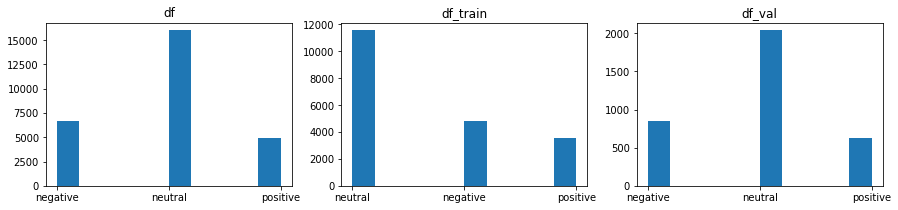

<Figure size 432x288 with 0 Axes>

In [132]:
# Plot distribution
fig,ax =plt.subplots(1,3,figsize=(15,3))
ax[0].hist(df['label'].values)
ax[0].set_title('df')
ax[1].hist(df_train['label'].values)
ax[1].set_title('df_train')
ax[2].hist(df_val['label'].values)
ax[2].set_title('df_val')
plt.figure()

# Deep Learning

## Text Preprocessing

In [133]:
from keras.preprocessing import text
from keras.preprocessing import sequence
from sklearn import preprocessing

In [134]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(['negative', 'neutral', 'positive'])

LabelEncoder()

In [135]:
x_train = df_train['texts'].values
x_val = df_val['texts'].values
x_test = df_test['texts'].values

y_train = label_encoder.transform(df_train['label'].values)
y_val = label_encoder.transform(df_val['label'].values)
y_test = label_encoder.transform(df_test['label'].values)

In [136]:
# Define parameter
max_word = 50000
maxlen = 1000
max_features = 50000

In [137]:
# Define Tokenizer
tokenizer = text.Tokenizer(num_words = max_word) #define corpus  to keep maximum number of words 
tokenizer.fit_on_texts(x_train)
tokenizer.num_words

50000

In [ ]:
tokenizer.index_word

In [138]:
def preprocess_fn(data):
    sequeces = tokenizer.texts_to_sequences(data)
    padding_sequences = sequence.pad_sequences(sequeces,maxlen = maxlen)
    
    return padding_sequences, sequeces

In [139]:
# Preprocess data
x_train_padded, sequeces_x_train =  preprocess_fn(x_train)
x_val_padded, sequeces_x_val = preprocess_fn(x_val)

## Model Construction

In [140]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [141]:
def show_result(history): 
    
    # Print the result from the last epoch
    print('Last train accuracy: %s'%history.history['acc'][-1])
    print('Last validation accuracy: %s'%history.history['val_acc'][-1])
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    epochs = range(1, len(loss) + 1)   
    
    # Define a subplot 
    fig, axs = plt.subplots(1,2,figsize=(15,4))
    
    # Plot loss
    loss_plot = axs[0]
    
    loss_plot.plot(epochs, loss, 'c--', label='Training loss')
    loss_plot.plot(epochs, val_loss, 'b', label='Validation loss')
    loss_plot.set_title('Training and validation loss')
    loss_plot.set_xlabel('Epochs')
    loss_plot.set_ylabel('Loss')
    loss_plot.legend()
    
    # Plot accuracy
    acc_plot = axs[1]
    
    acc_plot.plot(epochs, acc, 'c--', label='Training acc')
    acc_plot.plot(epochs, val_acc, 'b', label='Validation acc')
    acc_plot.set_title('Training and validation accuracy')
    acc_plot.set_xlabel('Epochs')
    acc_plot.set_ylabel('Accuracy')
    acc_plot.legend()

In [142]:
def predict_text(text, model):
  text, sequences_text = preprocess_fn(text)
  result = model.predict(text)

  if result[0][0] > 0.5:
    print('negative')
  elif result[0][0] > 0.5:
    print('neutral')
  else:
    print('positive')

### LSTM1 (overfit)

In [143]:
# Define model
lstm = models.Sequential()
lstm.add(layers.Embedding(max_features,32,input_length=maxlen))
lstm.add(layers.LSTM(32))
lstm.add(layers.Dense(64,activation='elu'))
lstm.add(layers.Dense(3,activation='softmax'))

lstm.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])
lstm.summary()

2021-09-01 11:45:36.095062: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-01 11:45:36.096624: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 32)          1600000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 1,610,627
Trainable params: 1,610,627
Non-trainable params: 0
_________________________________________________________________


In [144]:
history_lstm =  lstm.fit(x_train_padded, y_train, epochs=10, batch_size=32, validation_data=(x_val_padded, y_val))

2021-09-01 11:45:44.788160: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/10
621/621 [==============================] - 177s 283ms/step - loss: 0.9508 - acc: 0.5793 - val_loss: 0.9039 - val_acc: 0.5843
Epoch 2/10
621/621 [==============================] - 179s 289ms/step - loss: 0.8506 - acc: 0.6341 - val_loss: 0.8875 - val_acc: 0.6025
Epoch 3/10
621/621 [==============================] - 176s 283ms/step - loss: 0.7352 - acc: 0.7010 - val_loss: 0.9288 - val_acc: 0.6074
Epoch 4/10
621/621 [==============================] - 176s 284ms/step - loss: 1.5466 - acc: 0.7244 - val_loss: 0.9707 - val_acc: 0.6102
Epoch 5/10
621/621 [==============================] - 192s 310ms/step - loss: 0.6522 - acc: 0.7780 - val_loss: 1.0764 - val_acc: 0.6039
Epoch 6/10
621/621 [==============================] - 171s 276ms/step - loss: 0.5044 - acc: 0.8268 - val_loss: 1.1072 - val_acc: 0.6088
Epoch 7/10
621/621 [==============================] - 173s 278ms/step - loss: 0.4165 - acc: 0.8533 - val_loss: 1.1004 - val_acc: 0.6062
Epoch 8/10
621/621 [============================

Last train accuracy: 0.8550651669502258
Last validation accuracy: 0.596521258354187


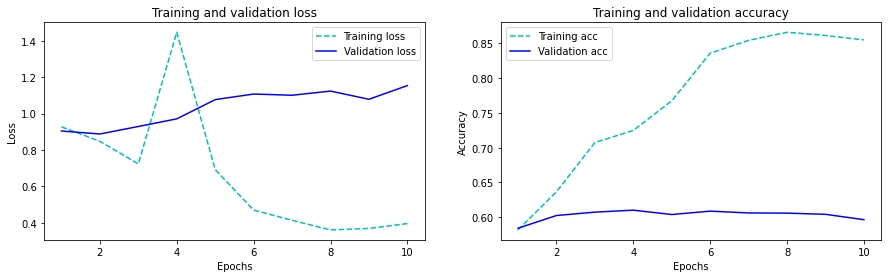

In [145]:
show_result(history_lstm)

In [146]:
lstm.save_weights("model_lstm.h5")

### LSTM2 add dropout (still overfit)

In [175]:
# Define model
lstm_2 = models.Sequential()
lstm_2.add(layers.Embedding(max_features,32,input_length=maxlen))
lstm_2.add(layers.LSTM(32))
lstm_2.add(layers.Dense(64,activation='elu'))
lstm_2.add(Dropout(0.5))
lstm_2.add(layers.Dense(3,activation='softmax'))

lstm_2.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])
lstm_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 32)          1600000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 1,610,627
Trainable params: 1,610,627
Non-trainable params: 0
_________________________________________________________________


In [176]:
history_lstm_2 =  lstm_2.fit(x_train_padded, y_train, epochs=10, batch_size=32, validation_data=(x_val_padded, y_val))

Epoch 1/10
621/621 [==============================] - 16912s 27s/step - loss: 0.9636 - acc: 0.5765 - val_loss: 0.9100 - val_acc: 0.5820
Epoch 2/10
621/621 [==============================] - 18856s 30s/step - loss: 0.8701 - acc: 0.6191 - val_loss: 0.9091 - val_acc: 0.5971
Epoch 3/10
621/621 [==============================] - 138s 222ms/step - loss: 0.7835 - acc: 0.6785 - val_loss: 0.9449 - val_acc: 0.6025
Epoch 4/10
621/621 [==============================] - 146s 234ms/step - loss: 0.7609 - acc: 0.7211 - val_loss: 0.9437 - val_acc: 0.4827
Epoch 5/10
621/621 [==============================] - 145s 234ms/step - loss: 0.9844 - acc: 0.6210 - val_loss: 1.0901 - val_acc: 0.4579
Epoch 6/10
621/621 [==============================] - 146s 236ms/step - loss: 0.5874 - acc: 0.7780 - val_loss: 1.0691 - val_acc: 0.6091
Epoch 7/10
621/621 [==============================] - 148s 239ms/step - loss: 0.6200 - acc: 0.8069 - val_loss: 1.0917 - val_acc: 0.6068
Epoch 8/10
621/621 [============================

Last train accuracy: 0.8397665023803711
Last validation accuracy: 0.6107784509658813


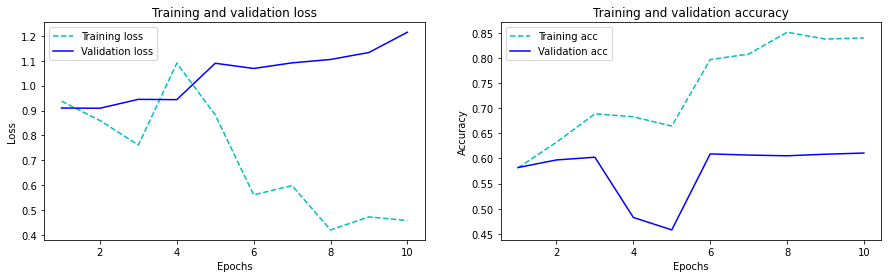

In [199]:
show_result(history_lstm_2)

In [207]:
lstm_2.save_weights("model_lstm_2.h5")

### RNN (overfit)

In [178]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_features,32,input_length=maxlen))
rnn.add(layers.SimpleRNN(32))
rnn.add(layers.Dense(64,activation='elu'))
rnn.add(layers.Dense(3,activation='softmax'))

rnn.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])
rnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1000, 32)          1600000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 1,604,387
Trainable params: 1,604,387
Non-trainable params: 0
_________________________________________________________________


In [179]:
history_rnn =  rnn.fit(x_train_padded, y_train,epochs=10, batch_size=32,validation_data=(x_val_padded, y_val))
#overfitting

Epoch 1/10
621/621 [==============================] - 80s 127ms/step - loss: 0.9522 - acc: 0.5764 - val_loss: 0.9229 - val_acc: 0.5883
Epoch 2/10
621/621 [==============================] - 80s 129ms/step - loss: 0.8482 - acc: 0.6240 - val_loss: 0.9345 - val_acc: 0.5922
Epoch 3/10
621/621 [==============================] - 80s 129ms/step - loss: 0.6714 - acc: 0.7224 - val_loss: 1.0383 - val_acc: 0.5834
Epoch 4/10
621/621 [==============================] - 80s 129ms/step - loss: 0.5174 - acc: 0.8045 - val_loss: 1.1312 - val_acc: 0.5711
Epoch 5/10
621/621 [==============================] - 80s 129ms/step - loss: 0.4047 - acc: 0.8454 - val_loss: 1.2785 - val_acc: 0.5540
Epoch 6/10
621/621 [==============================] - 86s 138ms/step - loss: 0.3799 - acc: 0.8603 - val_loss: 1.3591 - val_acc: 0.4234
Epoch 7/10
621/621 [==============================] - 79s 127ms/step - loss: 0.3253 - acc: 0.8707 - val_loss: 1.3917 - val_acc: 0.4354
Epoch 8/10
621/621 [==============================] - 8

Last train accuracy: 0.8764027953147888
Last validation accuracy: 0.5486170649528503


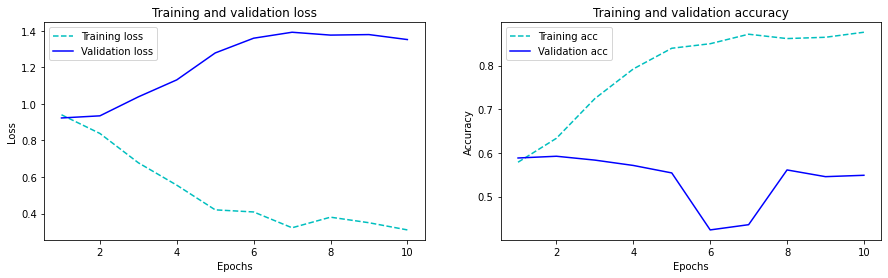

In [209]:
show_result(history_rnn)

In [208]:
rnn.save_weights("model_rnn.h5")

# Supervise Learning

## Create features

In [151]:
y_train = df_train['label']
y_val = df_val['label']
y_test = df_test['label']

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=20, sublinear_tf=True)
tfidf_fit = tfidf.fit(df["texts"])
text_train = tfidf_fit.transform(df_train["texts"])
text_val = tfidf_fit.transform(df_val["texts"])
text_test = tfidf_fit.transform(df_test["texts"])

joblib.dump(tfidf_fit, 'vectorizer.joblib')

['vectorizer.joblib']

In [157]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_fit = scaler.fit(df[["wc","uwc"]].astype(float))
num_train = scaler_fit.transform(df_train[["wc","uwc"]].astype(float))
num_val = scaler_fit.transform(df_val[["wc","uwc"]].astype(float))
num_test = scaler_fit.transform(df_test[["wc","uwc"]].astype(float))

joblib.dump(scaler_fit, 'scaler.joblib')

['scaler.joblib']

In [158]:
x_train = np.concatenate([num_train,text_train.toarray()],axis=1)
x_val = np.concatenate([num_val,text_val.toarray()],axis=1)
x_test = np.concatenate([num_test,text_test.toarray()],axis=1)
x_train.shape, x_val.shape

((19871, 3046), (3507, 3046))

In [162]:
#fit logistic regression models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(C=2, penalty="l2", solver="liblinear", dual=False, multi_class="ovr")
model.fit(x_train,y_train)
model.score(x_val, y_val)

0.6832050185343599

In [163]:
joblib.dump(model, 'model_LogR.joblib')

['model_LogR.joblib']

In [164]:
probs = model.predict_proba(x_val)
probs_df = pd.DataFrame(probs)
probs_df.columns = model.classes_
probs_df["preds"] = model.predict(x_val)
probs_df["label"] = df_val.label
probs_df["texts"] = df_val.texts
probs_df["hit"] = (probs_df.preds==probs_df.label)
probs_df

negative   neutral  positive     preds     label  \
0     0.422965  0.473471  0.103564   neutral  negative   
1     0.022180  0.965377  0.012443   neutral   neutral   
2     0.395265  0.464918  0.139818   neutral   neutral   
3     0.058990  0.680631  0.260378   neutral   neutral   
4     0.244163  0.591474  0.164363   neutral   neutral   
...        ...       ...       ...       ...       ...   
3502  0.732671  0.227775  0.039554  negative  negative   
3503  0.202186  0.682268  0.115546   neutral   neutral   
3504  0.545910  0.240194  0.213896  negative  negative   
3505  0.113948  0.614541  0.271511   neutral  negative   
3506  0.609002  0.269789  0.121209  negative  negative   

                                                  texts    hit  
0                               ‡∏Ç‡∏±‡∏ö‡∏á‡πà‡∏≤‡∏¢‡∏Å‡∏ß‡πà‡∏≤‡∏ß‡∏µ‡∏≠‡∏≠‡∏™‡πÄ‡∏¢‡∏≠‡∏∞‡πÄ‡∏•‡∏¢  False  
1     ‡πÅ‡∏≠‡∏î‡∏°‡∏¥‡∏ô‡∏Ç‡∏≠‡∏≠‡∏†‡∏±‡∏¢‡πÉ‡∏ô‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏ì‡πå‡∏ó‡∏µ‡πà‡πÄ‡∏Å‡∏¥‡∏î‡∏Ç‡∏∂‡πâ‡∏ô‡∏à‡∏≤‡∏Å‡πÉ‡∏à‡∏à‡∏£‡∏¥‡∏á‡∏°‡∏≤ ...   True  
2     ‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ã‡∏∑‡πâ‡∏≠‡∏´‡∏ô‡πâ‡∏≤‡∏£‡πâ‡∏≤‡∏ô‡∏Å‡∏•‡∏±‡∏ö‡∏ö‡πâ‡∏≤‡∏ô‡πÑ‡∏î‡πâ‡∏Ñ‡πà‡∏∞ ‡πÅ‡∏ï‡πà‡πÑ‡∏°‡πà‡∏£‡πà‡∏ß‡∏°‡∏ö‡∏£‡∏¥...   True  
3     ‡∏Å‡πá‡∏Ñ‡∏∑‡∏≠‡∏ö‡∏µ‡∏ó‡∏™‡∏°‡∏Å‡∏±‡∏ö‡πÄ‡∏õ‡πá‡∏ô‡∏°‡∏≠‡∏ô‡∏≠‡∏∞ ‡∏ü‡∏±‡∏á‡∏à‡∏≤‡∏Å‡∏î‡∏≠‡∏¢‡∏™‡∏∏‡πÄ‡∏ó‡∏û ‡∏Å‡πá‡∏£‡∏π‡πâ‡∏ß‡πà‡∏≤...   True  
4                               ‡∏≠‡∏≠‡πÄ‡∏à‡πâ‡∏≤ ‡∏Ç‡πâ‡∏≤‡∏≠‡∏¢‡∏≤‡∏Å‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡πÄ‡∏Å‡∏¥‡∏ô   True  
...                                                 ...    ...  
3502                           ‡πÄ‡∏´‡∏•‡πâ‡∏≤‡∏Ç‡∏≤‡∏ß ‡πÅ‡∏û‡∏á‡∏Å‡∏ß‡πà‡∏≤‡πÑ‡∏Æ‡πÄ‡∏ô‡πÄ‡∏Å‡πâ‡∏ô   True  
3503  : ‡∏£‡∏´‡∏±‡∏™‡∏ï‡∏±‡∏ß‡πÅ‡∏£‡∏á‡∏Ñ‡∏£‡∏±‡πâ‡∏á‡πÅ‡∏£‡∏Å‡πÉ‡∏ô suv ‡∏Ç‡∏≠‡∏á‡∏Ñ‡πà‡∏≤‡∏¢ ‡∏°‡∏≤‡∏Å‡∏±‡∏ö‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠...   True  
3504                 ‡∏™‡πÄ‡∏°‡∏≠‡∏ô‡∏≠‡∏ü‡∏≠‡∏µ‡πÄ‡∏•‡πâ‡∏Ñ‡∏ó‡∏£‡∏¥‡∏Ñ‡∏ö‡∏•‡∏π‡∏£‡∏™‡∏ä‡∏≤‡∏ï‡∏¥‡πÄ‡∏´‡∏µ‡πâ‡∏¢‡∏°‡∏≤‡∏Å   True  
3505  ‡∏ô‡πà‡∏≤‡∏Å‡∏•‡∏±‡∏ß üòü ‡πÄ‡∏≠‡∏≤‡πÉ‡∏à‡∏ä‡πà‡∏ß‡∏¢‡∏Ç‡∏≠‡πÉ‡∏´‡πâ‡∏õ‡∏•‡∏≠‡∏î‡∏†‡∏±‡∏¢‡∏ó‡∏∏‡∏Å‡∏Ñ‡∏ô üôè #‡∏û‡∏≤‡∏¢‡∏∏‡∏õ‡∏≤‡∏ö‡∏∂‡∏Å  False  
3506  ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ô‡πÄ‡∏õ‡πá‡∏ô‡∏ä‡πà‡∏≤‡∏á‡πÅ‡∏ï‡πà‡∏á‡∏´‡∏ô‡πâ‡∏≤ ‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡∏•‡∏¥‡∏õ‡πÄ‡∏°‡∏¢‡πå‡πÄ‡∏ö‡∏•‡∏•‡∏µ‡∏ô‡∏™‡∏∏‡∏î‡∏Æ‡∏¥...   True  

[3507 rows x 7 columns]

0.6832050185343599


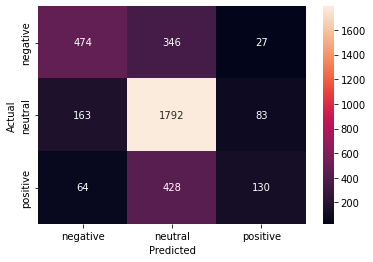

In [165]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(probs_df.label,probs_df.preds)
print(model.score(x_val,y_val))
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [179]:
false_df = probs_df.loc[probs_df['hit'] == False]

In [180]:
false_df.head(20)

negative   neutral  positive     preds     label  \
0   0.422965  0.473471  0.103564   neutral  negative   
8   0.176452  0.541444  0.282104   neutral  positive   
14  0.464961  0.489640  0.045398   neutral  negative   
15  0.428441  0.491261  0.080298   neutral  negative   
16  0.732722  0.238732  0.028545  negative   neutral   
17  0.651788  0.260793  0.087419  negative   neutral   
18  0.092394  0.766832  0.140773   neutral  negative   
21  0.321644  0.602834  0.075523   neutral  negative   
24  0.573547  0.337968  0.088485  negative   neutral   
27  0.110398  0.664710  0.224892   neutral  positive   
30  0.110398  0.664710  0.224892   neutral  positive   
33  0.244859  0.422387  0.332754   neutral  positive   
35  0.762637  0.217163  0.020200  negative   neutral   
37  0.030050  0.745214  0.224735   neutral  positive   
38  0.078069  0.814530  0.107401   neutral  positive   
40  0.172638  0.565663  0.261699   neutral  positive   
51  0.418441  0.528209  0.053350   neutral  negative   
53  0.116282  0.661440  0.222278   neutral  negative   
55  0.108493  0.665749  0.225758   neutral  positive   
57  0.389566  0.544385  0.066049   neutral  positive   

                                                texts    hit  
0                             ‡∏Ç‡∏±‡∏ö‡∏á‡πà‡∏≤‡∏¢‡∏Å‡∏ß‡πà‡∏≤‡∏ß‡∏µ‡∏≠‡∏≠‡∏™‡πÄ‡∏¢‡∏≠‡∏∞‡πÄ‡∏•‡∏¢  False  
8                                         ‡∏à‡∏∞‡πÄ‡∏•‡∏µ‡πâ‡∏¢‡∏á‡∏´‡∏£‡∏≤  False  
14  ‡∏≠‡∏ß‡∏™‡∏≤‡∏ô‡πÇ‡∏•‡∏Å‡∏™‡∏ß‡∏¢ ‡πÉ‡∏Ñ‡∏£‡∏à‡∏∞‡πÑ‡∏õ‡∏Ñ‡∏¥‡∏î‡∏ß‡πà‡∏≤‡∏à‡∏∞‡πÄ‡∏à‡∏≠‡∏Å‡∏±‡∏ö‡∏ï‡∏±‡∏ß‡πÄ‡∏≠‡∏á ‡∏≠‡∏µ‡πÄ‡∏´‡∏µ‡πâ...  False  
15  innisfree ‡∏ß‡∏¥‡∏ï‡∏ã‡∏µ it's skin ‡πÄ‡∏£‡∏≤‡∏´‡∏ô‡πâ‡∏≤‡∏°‡∏±‡∏ô‡πÉ‡∏ä‡πâ‡πÅ‡∏•‡πâ‡∏ß‡∏°‡∏±‡∏ô...  False  
16                                          ‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏™‡∏°‡∏≠‡∏á  False  
17               ‡πÉ‡∏ä‡πà‡∏Ñ‡∏£‡∏±‡∏ö ‡πÄ‡∏´‡πá‡∏ô‡∏°‡∏µ‡∏£‡∏ñ‡∏°‡∏≤‡∏™‡∏î‡πâ‡∏≤‡∏°‡∏≤‡πÄ‡∏ä‡πá‡∏Ñ‡∏£‡∏∞‡∏¢‡∏∞‡∏î‡πâ‡∏ß‡∏¢  False  
18  ‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà‡∏ô‡∏≠‡∏Å‡πÄ‡∏Å‡∏≤‡∏´‡∏•‡∏µ ‡πÄ‡∏Ç‡∏°‡∏£‡∏ã‡∏≠‡∏á‡∏•‡∏∞ 25 ‡∏°‡∏≤‡πÑ‡∏ó‡∏¢‡∏ã‡∏≠‡∏á‡∏•‡∏∞ 5-60 ‡∏ï...  False  
21  ‡∏ß‡πà‡∏≤‡∏à‡∏∞‡πÑ‡∏õ‡∏Å‡∏¥‡∏ô‡πÄ‡∏õ‡πá‡∏î‡∏¢‡πà‡∏≤‡∏á‡πÄ‡∏≠‡πá‡∏°‡πÄ‡∏Ñ‡∏ã‡∏∞‡∏´‡∏ô‡πà‡∏≠‡∏¢ ‡∏≠‡πà‡∏≤‡∏ß ‡πÄ‡∏õ‡πá‡∏î‡∏≠‡∏¢‡∏π‡πà‡πÉ...  False  
24  ‡∏ó‡∏©‡∏ä ‡∏£‡∏π‡πâ‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏ô‡∏µ‡πâ‡πÅ‡∏•‡πâ‡∏ß ‡πÄ‡∏û‡∏£‡∏≤‡∏∞‡∏ï‡∏≤‡∏°‡∏£‡∏±‡∏ê‡∏ò‡∏£‡∏£‡∏°‡∏ô‡∏π‡∏ç 60 ‡πÑ‡∏î‡πâ...  False  
27                                           ‡∏à‡∏±‡∏î‡πÑ‡∏õ‡∏Ñ‡πà‡∏∞  False  
30                                   ‡∏•‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏ï‡∏£‡∏á‡πÑ‡∏´‡∏ô‡∏Ñ‡∏£‡∏±‡∏ö  False  
33                    ‡∏ô‡∏µ‡πà‡πÉ‡∏ä‡πâ‡∏Ç‡∏≠‡∏á l'oreal ‡∏ó‡∏∏‡∏Å‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÄ‡∏•‡∏¢‡∏Ñ‡∏∞  False  
35           ‡πÉ‡∏™‡πà‡∏ú‡πâ‡∏≤‡∏≠‡∏ô‡∏≤‡∏°‡∏±‡∏¢‡πÅ‡∏ö‡∏ö‡∏ß‡∏±‡∏ô‡∏°‡∏≤‡∏°‡∏≤‡∏Å‡∏´‡∏£‡∏∑‡∏≠‡πÅ‡∏û‡∏°‡πÄ‡∏û‡∏¥‡∏™‡πÄ‡∏•‡∏¢‡∏à‡πâ‡∏≤  False  
37                                    ‡∏ß‡∏±‡∏ô‡πÜ‡∏´‡∏≤‡πÅ‡∏ï‡πà‡∏Ç‡∏≠‡∏á‡∏Å‡∏¥‡∏ô  False  
38                                 ‡∏ï‡∏±‡∏ß‡∏ô‡∏¥‡πÅ‡∏ã‡∏ö‡∏Å‡∏ß‡πà‡∏≤‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ô  False  
40  ‡∏ä‡∏∑‡πà‡∏≠ ‡πÄ‡∏≠‡∏™‡πÄ‡∏õ‡∏£‡∏™‡πÇ‡∏ã ‡∏Ñ‡∏∏‡∏ì‡∏ä‡∏≤‡∏¢ ‡∏Å‡∏≤‡πÅ‡∏ü‡∏î‡∏≥ mk ‡∏ô‡∏∞‡∏°‡∏µ ‡πÅ‡∏ï‡πà‡πÇ‡∏õ‡∏£‡πÇ‡∏°‡∏ä...  False  
51  ‡∏ì. ‡πÄ‡∏ß‡∏•‡∏≤‡∏ô‡∏µ‡πâ ‡∏ó‡∏§‡∏©‡∏é‡∏µ‡∏ï‡πà‡∏≤‡∏á‡πÜ‡∏°‡∏±‡∏ô‡∏ä‡πà‡∏≤‡∏á ‡∏ï‡∏µ‡∏Å‡∏±‡∏ô‡∏°‡∏∞‡∏•‡∏∏‡∏á‡∏ï‡∏∏‡∏á‡∏ô‡∏±‡∏á ...  False  
53                            ‡∏ó‡∏µ‡πà‡∏Å‡∏≥‡πÅ‡∏û‡∏á‡πÄ‡∏û‡∏ä‡∏£‡∏°‡∏µ‡πÇ‡∏õ‡∏£‡πÑ‡∏´‡∏°‡∏Ñ‡∏±‡∏ü  False  
55                                          ‡∏ß‡∏±‡∏ô‡πÑ‡∏´‡∏ô‡∏•‡πà‡∏∞  False  
57  üì£ ‡∏≠‡∏±‡∏ô‡∏•‡∏∞ 100- 3ce mini hand mirror ‡∏Å‡∏£‡∏∞‡∏à‡∏Å‡∏û‡∏Å‡∏û‡∏≤ 3c...  False

### prediction

In [168]:
def predict_text2(text, model):
    text_processed = process_thai(text)
    text_wc = len(text_processed)
    text_uwc = len(set(text_processed))
    
    data = {'text': [text], 'wc': [text_wc], 'uwc': [text_uwc]}
    df_predict = pd.DataFrame(data)
    
    text_predict = vectorizer_loadded.transform(df_predict['text'])
    num_predict = scaler_loadded.transform(df_predict[["wc","uwc"]].astype(float))
    x_predict = np.concatenate([num_predict,text_predict.toarray()],axis=1)
    
    result = model_loaded.predict(x_predict)
    
    return result[0]

In [169]:
model_loaded = joblib.load('model_LogR.joblib')
vectorizer_loadded = joblib.load('vectorizer.joblib')
scaler_loadded = joblib.load('scaler.joblib')

In [170]:
text = '‡∏™‡∏ß‡∏±‡∏™‡∏î‡∏µ‡∏ß‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏≠‡∏≤‡∏Å‡∏≤‡∏®‡∏î‡∏µ‡∏°‡∏≤‡∏Å‡πÜ'
predict_text2(text, model)

'neutral'